### *Task 1- Predict the percentage of a student based on the number of study hours*

In [1]:
# Importing the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/content/drive/MyDrive/DATASETS/SparksFoundation_Dataset/task1_student_scores_sparks"

In [3]:
score_df = pd.read_csv(path)

In [4]:
score_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
score_df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
score_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
score_df.shape

(25, 2)

In [ ]:
score_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## *Vizualizing the Dataset* **bold text**

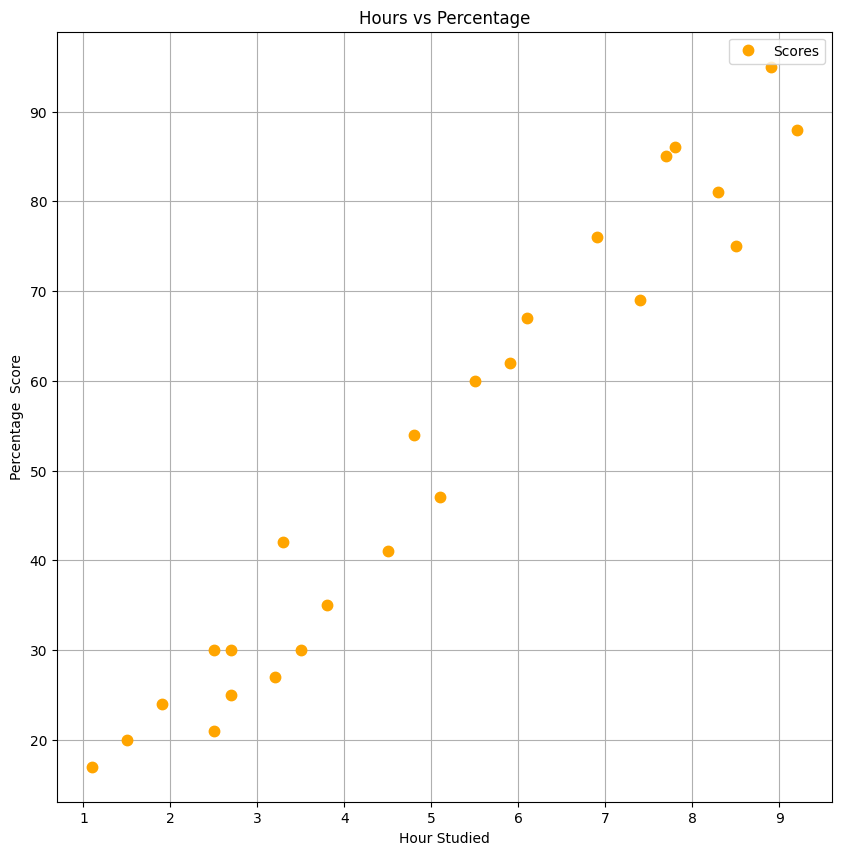

In [8]:
plt.rcParams["figure.figsize"] = [10,10]
score_df.plot(x='Hours', y='Scores', style='.', color = 'orange', markersize = 15)
plt.title('Hours vs Percentage')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage  Score')
plt.grid()
plt.show()

In [ ]:
score_df.corr( )

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## *Data Preparation*

In [ ]:
x = score_df.iloc[:, :1].values
y = score_df.iloc[:, 1:].values
print('x:',x)
print('y:',y)

x: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y: [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [ ]:
#Spliting The Dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size= 0.2, random_state = 0)

## *Training the algorithm*

In [ ]:
 from sklearn.linear_model import LinearRegression

 lr = LinearRegression()
 lr.fit(x_train, y_train)

LinearRegression()

## *Visualizing the model*

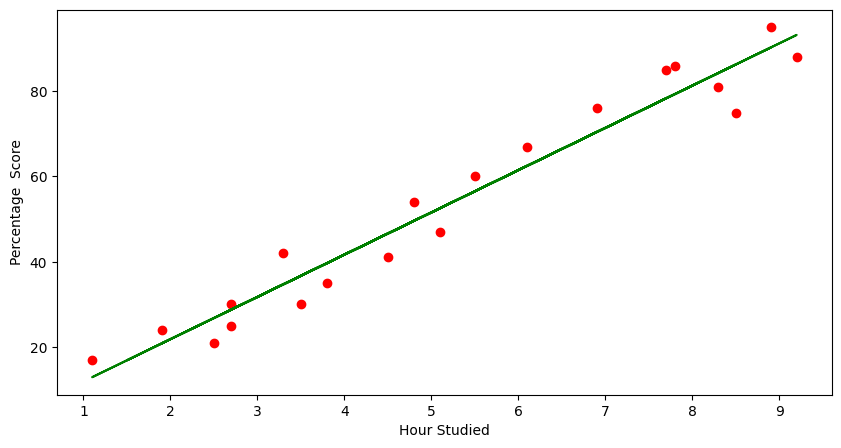

In [ ]:
#Plotting the train data

line = lr.coef_*x + lr.intercept_

plt.rcParams["figure.figsize"] = [10,5]
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x, line, color = 'green')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage  Score')
#plt.grid()
plt.show()

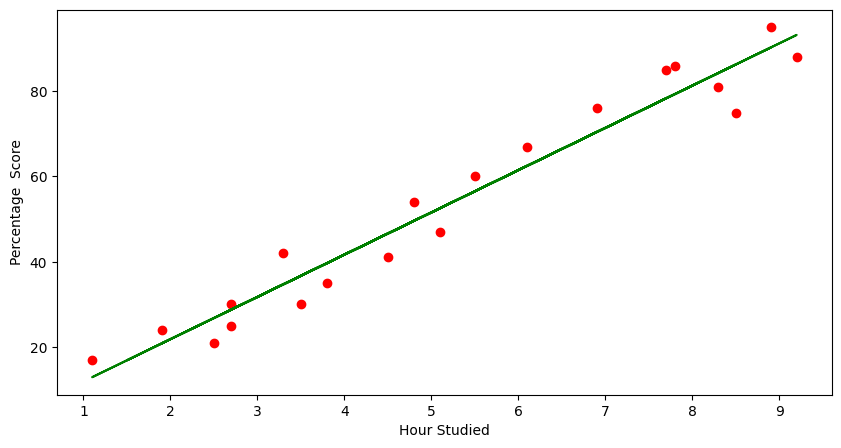

In [ ]:
#Plotting the test data

plt.rcParams["figure.figsize"] = [10,5]
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x, line, color = 'green')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage  Score')
#plt.grid()
plt.show()

In [ ]:
print(x_test) #testing data in hr

y_pred = lr.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#actual vs predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [ ]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
comp = pd.DataFrame({'Actual': [y_test], 'Predicted' :[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [ ]:
#testing with our data

hr = 9.25
our_pred = lr.predict([[hr]])
print("The predicted score if a person studied for", hr, "hours is", our_pred[0])


The predicted score if a person studied for 9.25 hours is [93.69173249]


## *Evaluating the model*

In [ ]:
from sklearn import metrics
Print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_spred))

Mean Absolute Error: 4.183859899002982
